In [1]:
%matplotlib inline
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

The `scipy.stats` package contains a number of statistical distributions, with methods for generateing random numbers based on these distributions, and obtaining probability density functions.

In [11]:
import scipy.stats as stats

# Generate two class instances of normal distributions
rv1 = stats.norm(loc=-0.2, scale=0.2)   # Normal distribution, 
rv2 = stats.norm(loc=1, scale=1)    # Mean is defined by 'loc', std is defined by 'scale'

# The rv.pdf(x) method gives the value of the pdf at location x
x = 0.2
print(rv1.pdf(x), rv2.pdf(x))

0.269954832566 0.289691552761


The joint probability density function is found by multiplying the values of the probability density functions at each location.

In [12]:
x = 0.2
print(rv1.pdf(x) * rv2.pdf(x))

0.0782036346215


Estimate the joint PDF by multiplying the PDF values for a range of x values.

In [13]:
x = np.linspace(-5, 5, 2001)
dx = x[1] - x[0]
rv = rv1.pdf(x) * rv2.pdf(x)
rv /= rv.sum() * dx

# Check to make sure the integral of the PDFs is 1.
norms = (np.sum(rv)*dx, np.sum(rv1.pdf(x))*dx, np.sum(rv2.pdf(x))*dx)
print(norms)
print('Normalized? ', np.allclose(norms, 1.0, rtol=1e-3))

(1.0, 0.99999999999997868, 0.99996866124699035)
Normalized?  True


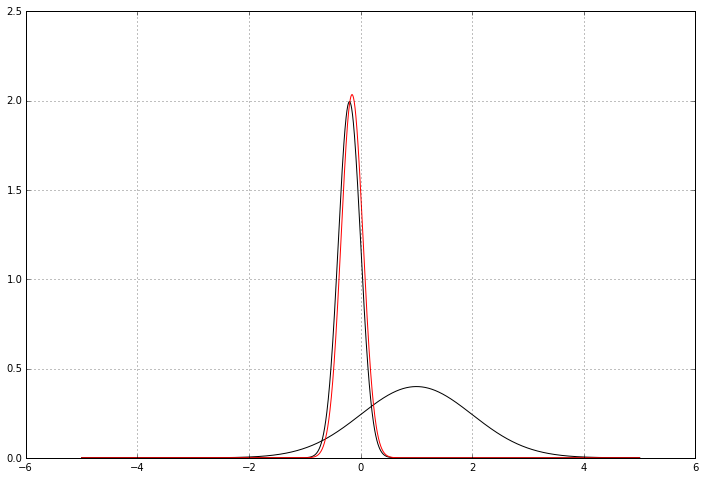

In [15]:
plt.plot(x, rv1.pdf(x), '-k')
plt.plot(x, rv2.pdf(x), '-k')
plt.plot(x, rv, '-r')
plt.grid(True)

(array([  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   1.10000000e+01,
          6.00000000e+00,   1.50000000e+01,   1.80000000e+01,
          2.40000000e+01,   2.90000000e+01,   6.00000000e+01,
          6.20000000e+01,   8.20000000e+01,   1.14000000e+02,
          1.16000000e+02,   1.76000000e+02,   1.93000000e+02,
          2.38000000e+02,   2.87000000e+02,   3.85000000e+02,
          4.71000000e+02,   5.72000000e+02,   6.14000000e+02,
          7.27000000e+02,   8.34000000e+02,   9.97000000e+02,
          1.23700000e+03,   1.32800000e+03,   1.51100000e+03,
          1.65200000e+03,   1.90900000e+03,   2.06700000e+03,
          2.34200000e+03,   2.46600000e+03,   2.78000000e+03,
          2.84200000e+03,   3.08600000e+03,   3.07400000e+03,
          3.31600000e+03,   3.47300000e+03,   3.50600000e+03,
        

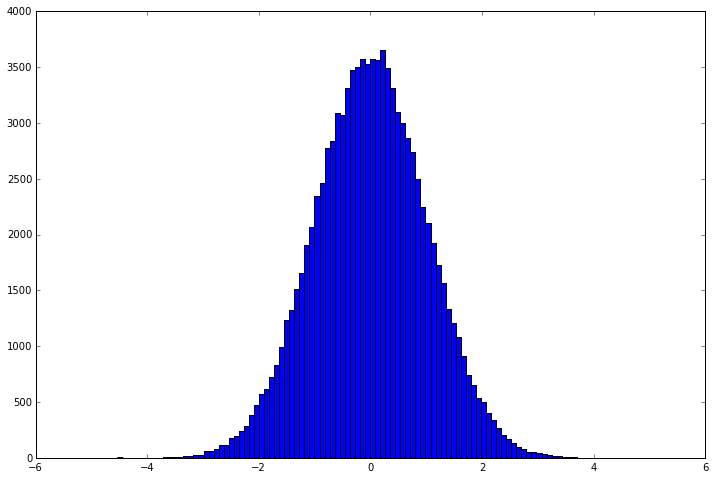

In [20]:
rv_test = stats.norm(loc=0, scale=1)
plt.hist(rv_test.rvs(100000), bins=100)